In [2]:
import math
import collections

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
pd.options.display.max_rows = 8

In [4]:
# /Users/farhoudkhoshnoud/Downloads/namesbystate/CA.TXT
pd.read_csv('/Users/farhoudkhoshnoud/Downloads/namesbystate/CA.TXT', 
            names=['state', 'sex', 'year', 'name', 'count'])


,state,sex,year,name,count
0,CA,F,1910,Mary,295
1,CA,F,1910,Helen,239
2,CA,F,1910,Dorothy,220
3,CA,F,1910,Margaret,163
...,...,...,...,...,...
420405,CA,M,2024,Ziah,5
420406,CA,M,2024,Zohaan,5
420407,CA,M,2024,Zubair,5
420408,CA,M,2024,Zuko,5


In [5]:
ca_data = pd.read_csv('/Users/farhoudkhoshnoud/Downloads/namesbystate/CA.TXT', 
            names=['state', 'gender', 'year', 'name', 'countname'])


In [6]:
ca_data.year.min(), ca_data.year.max()

(np.int64(1910), np.int64(2024))

In [7]:
ca_data.countname.min(), ca_data.countname.max()
# ca_data.count('name')



(np.int64(5), np.int64(8264))

In [8]:
unique_count = ca_data['name'].nunique()
unique_count

20830

In [11]:
max_values = ca_data.groupby('year')['countname'].max().reset_index()
# max_values = ca_data.groupby('year')['countname'].max()['name']


In [12]:
max_values

,year,countname
0,1910,295
1,1911,390
2,1912,534
3,1913,614
...,...,...
111,2021,2622
112,2022,2617
113,2023,2673
114,2024,2716


In [15]:
ca_data.query('year >= 1901 and year <= 1911 and  gender == "M"')

,state,gender,year,name,countname
246857,CA,M,1910,John,237
246858,CA,M,1910,William,170
246859,CA,M,1910,James,159
246860,CA,M,1910,Robert,141
...,...,...,...,...,...
247125,CA,M,1911,Roger,5
247126,CA,M,1911,Ronald,5
247127,CA,M,1911,Rudolph,5
247128,CA,M,1911,Willis,5


In [23]:
# ca_data[(ca_data.year >= 2020) & (ca_data.year <= 2024) & (ca_data.gender == 'M') 
#         & (ca_data.countname > 1000)].sort_values('year')

# ca_data.query('year >= 2020 and year <= 2024 and
              
# ca_data.groupby('year')['countname'].max().reset_index()

# didn't work
# ca_data[(ca_data.year >= 2020) & (ca_data.year <= 2024) & (ca_data.gender == 'M') 
#         & (ca_data.groupby('year')['countname'].max().reset_index())]

ca_data[(ca_data.year >= 2020) & (ca_data.year <= 2024) & (ca_data.gender == 'M') 
        & (ca_data['countname'].max())]


,state,gender,year,name,countname


In [33]:
# find the most popular name in each year
most_popular = ca_data.groupby(['year'])['countname'].idxmax().reset_index()
most_popular = ca_data.loc[most_popular['countname']]
# most_popular = ca_data.loc[most_popular['countname']].reset_index(drop=True)

In [34]:
most_popular


,state,gender,year,name,countname
0,CA,F,1910,Mary,295
233,CA,F,1911,Mary,390
484,CA,F,1912,Mary,534
247384,CA,M,1913,John,614
...,...,...,...,...,...
409008,CA,M,2021,Noah,2622
411898,CA,M,2022,Liam,2617
414799,CA,M,2023,Noah,2673
417594,CA,M,2024,Liam,2716


In [76]:
# find the most popular name in each year for both genders
most_popular = ca_data.groupby(['year', 'gender'])['countname'].idxmax().reset_index()

In [77]:
most_popular

,year,gender,countname
0,1910,F,0
1,1910,M,246857
2,1911,F,233
3,1911,M,246987
...,...,...,...
226,2023,F,239596
227,2023,M,414799
228,2024,F,243227
229,2024,M,417594


In [104]:
# this is working correctly
most_popular = ca_data.groupby(['year', 'gender'])['countname'].max().reset_index()
# most_popular = ca_data.groupby(['year', 'gender'])['countname'].idxmax().reset_index()

# most_popular = ca_data.groupby(['year', 'gender'])['countname'].max()

most_popular



,year,gender,countname
0,1910,F,295
1,1910,M,237
2,1911,F,390
3,1911,M,214
...,...,...,...
226,2023,F,1975
227,2023,M,2673
228,2024,F,1986
229,2024,M,2716


In [ ]:
(2025-1910)*2 #number of years in the data set (f, m)

230

In [11]:
ca_data2024 = ca_data.query('year == 2024')
# ca_data2024.loc[ca_data2024['countname']]


In [12]:
most_popular2024 = ca_data2024.groupby(['gender'])['countname'].idxmax().reset_index()
most_popular2024 = ca_data2024.loc[most_popular2024['countname']].reset_index(drop=True)
most_popular2024


,state,gender,year,name,countname
0,CA,F,2024,Mia,1986
1,CA,M,2024,Liam,2716


In [13]:
# this is correct code to find the most popular name in each year
# for both genders
# find the most popular name in each year
most_popular = ca_data.groupby(['year', 'gender'])['countname'].idxmax().reset_index()
most_popular = ca_data.loc[most_popular['countname']].reset_index(drop=True)
most_popular

,state,gender,year,name,countname
0,CA,F,1910,Mary,295
1,CA,M,1910,John,237
2,CA,F,1911,Mary,390
3,CA,M,1911,John,214
...,...,...,...,...,...
226,CA,F,2023,Olivia,1975
227,CA,M,2023,Noah,2673
228,CA,F,2024,Mia,1986
229,CA,M,2024,Liam,2716


In [14]:
ca_data2024
# find the most popular name in 202

,state,gender,year,name,countname
243227,CA,F,2024,Mia,1986
243228,CA,F,2024,Olivia,1931
243229,CA,F,2024,Camila,1885
243230,CA,F,2024,Emma,1833
...,...,...,...,...,...
420405,CA,M,2024,Ziah,5
420406,CA,M,2024,Zohaan,5
420407,CA,M,2024,Zubair,5
420408,CA,M,2024,Zuko,5


In [15]:
ca_data2024_total = ca_data2024.groupby(['gender'])['countname'].sum().reset_index()
# ca_data2024_total = ca_data2024.loc[ca_data2024_total['countname']].reset_index(drop=True)

ca_data2024_total


# total number of names in 2024
total_names_2024 = ca_data2024['countname'].sum()
total_names_2024



np.int64(344171)

In [16]:
ca_data_totalByYear = ca_data.groupby(['year', 'gender'])['countname'].sum().reset_index()

ca_data_totalByYear

,year,gender,countname
0,1910,F,5950
1,1910,M,3213
2,1911,F,6602
3,1911,M,3381
...,...,...,...
226,2023,F,164675
227,2023,M,179637
228,2024,F,164782
229,2024,M,179389


In [71]:
ca_data_totalByYear = ca_data.groupby(['year', 'gender'])['countname'].sum().reset_index()
# ca_data_totalByYear = ca_data.loc[ca_data_totalByYear['countname']].reset_index(drop=True)
ca_data_totalByYear

,year,gender,countname
0,1910,F,5950
1,1910,M,3213
2,1911,F,6602
3,1911,M,3381
...,...,...,...
226,2023,F,164675
227,2023,M,179637
228,2024,F,164782
229,2024,M,179389


In [86]:
# add a field to calculate the percentage of genders per year per gender
# ca_data_totalByYear['percentage'] = ca_data_totalByYear.groupby('year')['countname'].apply(lambda x: x / x.sum() * 100)
# ca_data_totalByYear = ca_data.groupby(['year', 'gender'])['countname'].sum().reset_index()
# ca_data_totalByYear['percentage'] = ca_data_totalByYear.groupby('year')['countname'].apply(lambda x: x / x.sum() * 100)

ca_data_totalByYear = ca_data.groupby(['year', 'gender'])['countname'].sum().reset_index()

ca_data_totalByYear['percentage'] = round(ca_data_totalByYear.groupby('year')['countname'].apply(lambda x: x / x.sum() * 100).reset_index(drop=True))

formatCountname = lambda x2: "{:,}".format(x2)
format = lambda x: '{:.0f}%'.format(x)

ca_data_totalByYear['percentage'] = ca_data_totalByYear['percentage'].apply(format)
ca_data_totalByYear['countname'] = ca_data_totalByYear['countname'].apply(formatCountname)

# pp.figure(figsize=(12, 6))
# pp.bar(ca_data_totalByYear['year'], ca_data_totalByYear['percentage'],
#         color=['blue' if x == 'M' else 'pink' for x in ca_data_totalByYear['gender']])


ca_data_totalByYear

,year,gender,countname,percentage
0,1910,F,"5,950",65%
1,1910,M,"3,213",35%
2,1911,F,"6,602",66%
3,1911,M,"3,381",34%
...,...,...,...,...
226,2023,F,"164,675",48%
227,2023,M,"179,637",52%
228,2024,F,"164,782",48%
229,2024,M,"179,389",52%


Text(0, 0.5, 'Number of Babies Born')

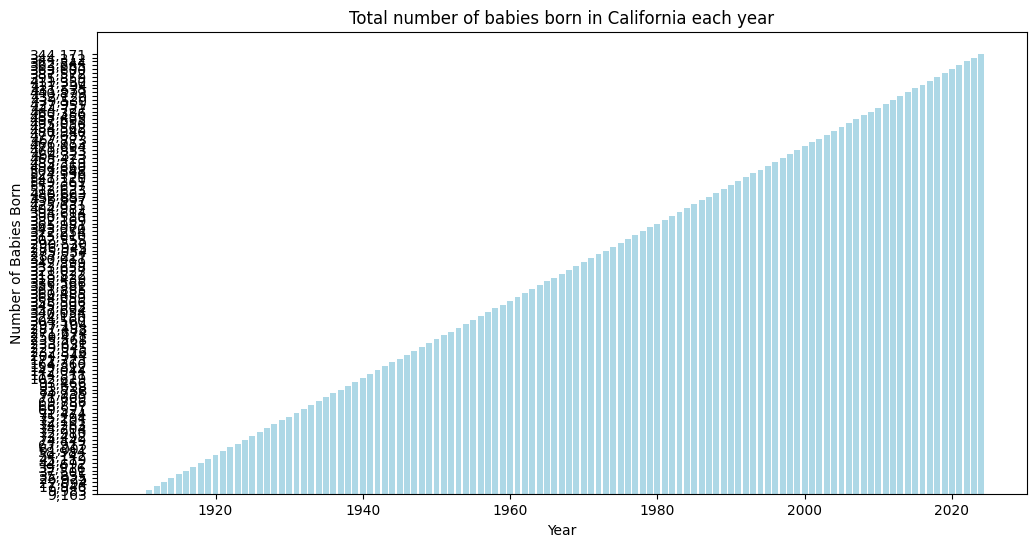

In [97]:
# baby born in each year
ca_data_totalByYear = ca_data.groupby(['year'])['countname'].sum().reset_index()
ca_data_totalByYear['countname'] = ca_data_totalByYear['countname'].apply(formatCountname)

ca_data_totalByYear

# Plotting the total number of babies born each year
pp.figure(figsize=(12, 6))
pp.bar(ca_data_totalByYear['year'], ca_data_totalByYear['countname'],
       color='lightblue')
pp.title('Total number of babies born in California each year')
pp.xlabel('Year')
pp.ylabel('Number of Babies Born')
# calculate percentage of groth in number of babies born each year



In [98]:
ca_data_totalByYear = ca_data.groupby(['year'])['countname'].sum().reset_index()
ca_data_totalByYear['countname'] = ca_data_totalByYear['countname'].apply(formatCountname)

ca_data_totalByYear['growth'] = ca_data_totalByYear['countname'].astype(int).pct_change() * 100
ca_data_totalByYear['growth'] = ca_data_totalByYear['growth'].apply(lambda x: '{:.2f}%'.format(x) if pd.notnull(x) else 'N/A')
pp.xticks(rotation=45)
pp.grid(axis='y', linestyle='--', alpha=0.7)
pp.tight_layout()
pp.show()

ValueError: invalid literal for int() with base 10: '9,163'